# Задание 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def implicit_euler_solve(lam, u0, T, dt):
    steps = int(T / dt)
    tt = np.arange(steps + 1) * dt
    y = np.empty(steps + 1)
    y[0] = u0
    for k in range(steps):
        y[k + 1] = y[k] / (1 - lam * dt)
    return tt, y   

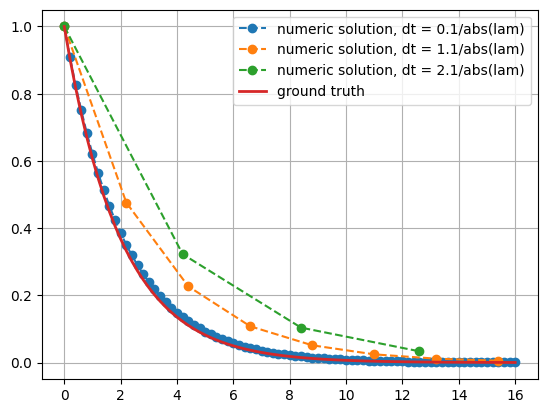

In [4]:
lam = -0.5

tt1, y1 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=0.1/abs(lam))
tt2, y2 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=1.1/abs(lam))
tt3, y3 = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

plt.figure()
plt.plot(tt1, y1, 'o--', label='numeric solution, dt = 0.1/abs(lam)')
plt.plot(tt2, y2, 'o--', label='numeric solution, dt = 1.1/abs(lam)')
plt.plot(tt3, y3, 'o--', label='numeric solution, dt = 2.1/abs(lam)')
plt.plot(tt1, np.exp(lam*tt1), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [5]:
# Для тестирования

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()

# Задача 2

In [6]:
def euler_solve2(a, u0, T, dt):
    
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    n = tt.shape[0]
    # YOUR CODE HERE
    y = np.zeros((n, ndim))
    for i in range(n):
        y[i] = expm(a * tt[i]) @ u0
    return tt, y 
    raise NotImplementedError()

In [9]:
def mat_exp_solve(a, u0, tt):
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    ndim = u0.shape[0]
    n=tt.shape[0]
    y = np.zeros((n, ndim))
    for i in range (n):
        y[i] = expm(a * tt[i]) @ u0
    return y   

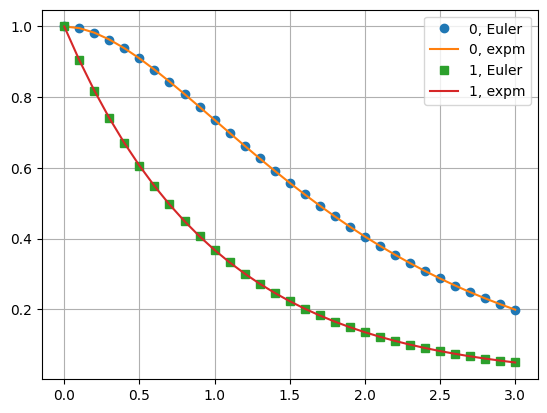

In [10]:
from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

# Задача 3

In [11]:
A = np.array([[-10, 10],[32, -499]])
np.linalg.eigvals(A) 

array([  -9.34647667, -499.65352333])

$499/9 >> 1$, $\max _j\left|\operatorname{Im} \lambda_j\right| = 0 << 499$, $\lambda_i < 0$ $⇒$
Система жесткая. 

Найдём шаг интегрирования:  
$
    \lambda_{max}h\left(1+\lambda_{max}h / 10\right) \leq 0 \hspace{2mm} \Rightarrow \hspace{2mm} h \leq \frac{-10}{\lambda_{max}}
$  
Система устойчива при $h \in (0, 0.02)$

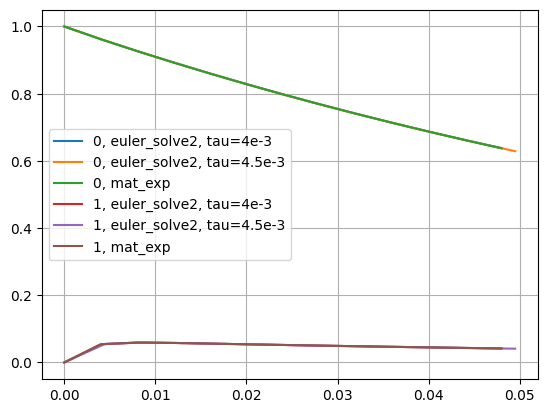

In [12]:
t1, y1  = euler_solve2(A, u0=[1, 0], T=0.05, dt=4e-3)
t2, y2  = euler_solve2(A, u0=[1, 0], T=0.05, dt=4.5e-3)
ym = mat_exp_solve(A, [1, 0], t1)

plt.plot(t1, y1[:, 0], label='0, euler_solve2, tau=4e-3')
plt.plot(t2, y2[:, 0], label='0, euler_solve2, tau=4.5e-3')
plt.plot(t1, ym[:, 0], label='0, mat_exp')

plt.plot(t1, y1[:, 1], label='1, euler_solve2, tau=4e-3')
plt.plot(t2, y2[:, 1], label='1, euler_solve2, tau=4.5e-3')
plt.plot(t1, ym[:, 1], label='1, mat_exp')

plt.grid()
plt.legend()

In [14]:
def euler_solve2_imp(a, u0, T, dt):
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    steps = int(T/dt)
    tt = np.arange(steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((steps+1, ndim))
    y[0] = u0
    for i in range(steps):
        y[i+1] = np.linalg.solve(np.eye(ndim) - dt * a, y[i])
    return tt, y

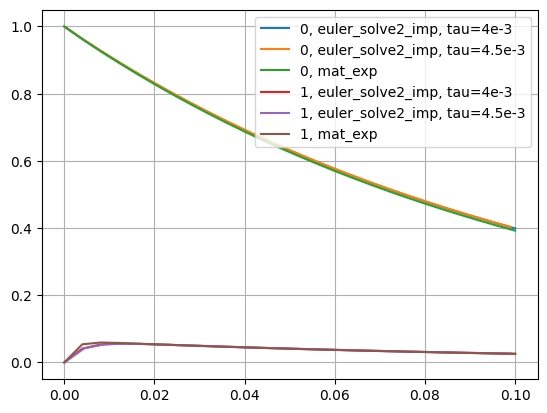

In [15]:
t1, y1  = euler_solve2_imp(A, u0=[1, 0], T=0.1, dt=4e-3)
t2, y2  = euler_solve2_imp(A, u0=[1, 0], T=0.1, dt=4.5e-3)
ym = mat_exp_solve(A, [1, 0], t1)

plt.plot(t1, y1[:, 0], label='0, euler_solve2_imp, tau=4e-3')
plt.plot(t2, y2[:, 0], label='0, euler_solve2_imp, tau=4.5e-3')
plt.plot(t1, ym[:, 0], label='0, mat_exp')

plt.plot(t1, y1[:, 1], label='1, euler_solve2_imp, tau=4e-3')
plt.plot(t2, y2[:, 1], label='1, euler_solve2_imp, tau=4.5e-3')
plt.plot(t1, ym[:, 1], label='1, mat_exp')

plt.grid()
plt.legend()